In [ ]:
import pandas as pd

# Load the Excel file
file_path = '/content/drive/MyDrive/federalelections2020.xlsx'
xls = pd.ExcelFile(file_path)

# Display the available sheet names
print(xls.sheet_names)


['1. 2020 Publication Information', '2. Table 1 Pres Popular Vote', '3. Table 2 Electoral & Pop Vote', '4. Table 3 GEVotefor Pres, H, S', '5. Table 4 GE VotesCastbyParty', '6. Table 5 P&GVotesCastforCong', '7. Table 6 Senate by Party', '8. Table 7 House by Party', '9. 2020 Pres General Results', '10. 2020 Pres Primary Results', '11.  Pres Primary Party Summary', '12. US Senate Results by State', '13. US House Results by State', '14. 2020 Party Labels', '15. 2020 Primary Dates', '16. Appendix 1A', '17. Appendix 1B', '18. Appendix 1C', '19. Special Elections 2019-2021']


In [ ]:
#  Load a specific sheet into a DataFrame
df = pd.read_excel(file_path, sheet_name='9. 2020 Pres General Results')

# Display the first few rows of the DataFrame
print(df.head())


   1     FEC ID    STATE STATE ABBREVIATION GENERAL ELECTION DATE FIRST NAME  \
0  2        NaN      NaN                NaN                   NaT        NaN   
1  3  P80001571  Alabama                 AL            2020-11-03  Donald J.   
2  4  P80000722  Alabama                 AL            2020-11-03  Joseph R.   
3  5  P00013524  Alabama                 AL            2020-11-03         Jo   
4  6        NaN  Alabama                 AL            2020-11-03        NaN   

   LAST NAME LAST NAME,  FIRST TOTAL VOTES PARTY  GENERAL RESULTS  GENERAL %  \
0        NaN               NaN         NaN   NaN              NaN        NaN   
1      Trump  Trump, Donald J.         NaN     R        1441170.0   0.620316   
2      Biden  Biden, Joseph R.         NaN     D         849624.0   0.365700   
3  Jorgensen     Jorgensen, Jo         NaN   IND          25176.0   0.010836   
4  Scattered         Scattered         NaN     W           7312.0   0.003147   

   TOTAL VOTES # COMBINED GE PARTY TOT

In [ ]:
# Drop rows where essential columns like 'STATE' or 'GENERAL RESULTS' are missing
df = df.dropna(subset=['STATE', 'GENERAL RESULTS'])


In [ ]:
#Renaming
df.rename(columns={'STATE ABBREVIATION': 'State Abbreviation', 'GENERAL RESULTS': 'General Results'}, inplace=True)


In [ ]:
# Convert 'GENERAL RESULTS' and 'GENERAL %' columns to numeric if necessary
df['General Results'] = pd.to_numeric(df['General Results'], errors='coerce')
df['GENERAL %'] = pd.to_numeric(df['GENERAL %'], errors='coerce')


In [ ]:
print(df.columns)


Index([                              1,                        'FEC ID',
                               'STATE',            'State Abbreviation',
               'GENERAL ELECTION DATE',                    'FIRST NAME',
                           'LAST NAME',             'LAST NAME,  FIRST',
                         'TOTAL VOTES',                         'PARTY',
                     'General Results',                     'GENERAL %',
                       'TOTAL VOTES #', 'COMBINED GE PARTY TOTALS (NY)',
                     'COMBINED % (NY)',              'WINNER INDICATOR',
                     'ELECTORAL VOTES',                     'FOOTNOTES'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
# Converting to numeric again (if applicable)
df['General Results'] = pd.to_numeric(df['General Results'], errors='coerce')

# Grouping data by party
countrywide_votes = df.groupby('PARTY')['General Results'].sum().sort_values(ascending=False)

# Displaying top two parties
top_two_parties = countrywide_votes.head(2)
print(top_two_parties)


PARTY
D    79064769.0
R    73927640.0
Name: General Results, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

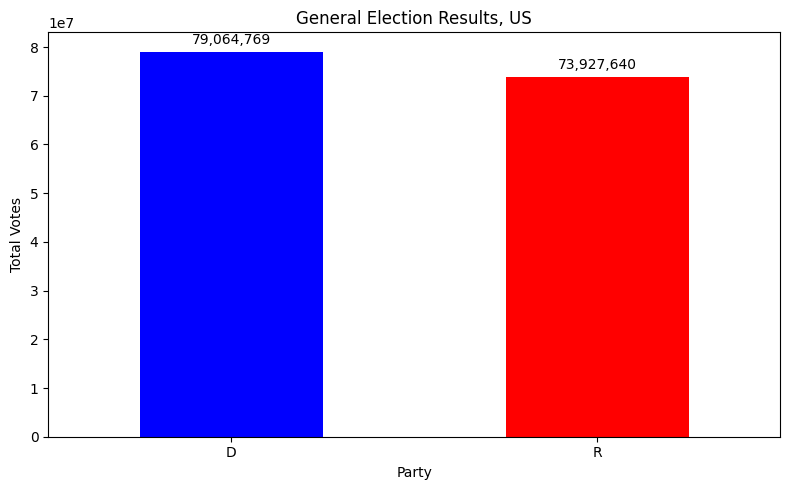

In [ ]:

# Plotting with specified colors and data labels
plt.figure(figsize=(8, 5))
colors = ['blue', 'red']  # Blue for Democratic, Red for Republican
ax = top_two_parties.plot(kind='bar', color=colors, title='General Election Results, US', ylabel='Total Votes', xlabel='Party')
plt.xticks(rotation=0)

# Adding data labels on top of each bar
for i, v in enumerate(top_two_parties):
    ax.text(i, v + 1000000, f'{int(v):,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
pip install geopandas plotly pandas


In [ ]:
# Convert 'ELECTORAL VOTES' column to numeric, forcing errors to NaN
df['ELECTORAL VOTES'] = pd.to_numeric(df['ELECTORAL VOTES'], errors='coerce')

# Drop rows with NaN values in 'ELECTORAL VOTES' after conversion
df = df.dropna(subset=['ELECTORAL VOTES'])

# Grouping and selecting data as before
df = df.groupby(['STATE ABBREVIATION', 'PARTY'], as_index=False).agg({'ELECTORAL VOTES': 'max'})
df = df.sort_values('ELECTORAL VOTES', ascending=False).drop_duplicates('STATE ABBREVIATION')


In [ ]:
# Filter to keep only 'D' and 'R' parties
df = df[df['PARTY'].isin(['D', 'R'])]


In [ ]:
print(df[df['STATE ABBREVIATION'] == 'MN'])


Empty DataFrame
Columns: [STATE ABBREVIATION, PARTY, ELECTORAL VOTES]
Index: []


In [ ]:
# Check the original DataFrame for rows with 'MN'
original_df = pd.read_excel(file_path, sheet_name='9. 2020 Pres General Results')
print(original_df[original_df['STATE ABBREVIATION'] == 'MN'])


       1     FEC ID      STATE STATE ABBREVIATION GENERAL ELECTION DATE  \
343  345  P80000722  Minnesota                 MN            2020-11-03   
344  346  P80001571  Minnesota                 MN            2020-11-03   
345  347  P00013524  Minnesota                 MN            2020-11-03   
346  348  P00012211  Minnesota                 MN            2020-11-03   
347  349        NaN  Minnesota                 MN            2020-11-03   
348  350  P00016741  Minnesota                 MN            2020-11-03   
349  351  P00016550  Minnesota                 MN            2020-11-03   
350  352  P60016342  Minnesota                 MN            2020-11-03   
351  353  P80005572  Minnesota                 MN            2020-11-03   
352  354  P00013771  Minnesota                 MN            2020-11-03   
353  355  P80005473  Minnesota                 MN            2020-11-03   
354  356  P00012039  Minnesota                 MN            2020-11-03   
355  357  P00014209  Minn

In [ ]:
# Display unique party values
print(original_df['PARTY'].unique())


[nan 'R' 'D' 'IND' 'W' 'LIB' 'GRE' 'CON' 'PET' 'ALL' 'ASP' 'LAL' 'SLP'
 'AIP' 'PAF' 'UN' 'AMC' 'UPC' 'IAP' 'P' 'PRO' 'APV' 'SWP' 'SEP' 'GPD'
 'STG' 'LBF' 'GPF' 'RPF' 'PSL' 'CPF' 'AMS' 'NPY' 'CPI' 'GKH' 'TBP' 'BON'
 'CUP' 'FP' 'LLC' 'UPA' 'GI' 'BR' 'GR' 'UST' 'NLP' 'DFL' 'IAL'
 'Combined Parties:' 'WF' 'CRV' 'IDP' 'DNL' 'PG' 'GRU' 'LBU' 'BF' 'BUL'
 'MTP']


In [ ]:
# Replace 'DFL' with 'D' in the PARTY column
df['PARTY'] = df['PARTY'].replace('DFL', 'D')


<ipython-input-36-4e28bc576d32>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Replace 'Combined Parties:' and 'WF' with 'D' in the PARTY column
df['PARTY'] = df['PARTY'].replace({
    'Combined Parties:': 'D',
    'WF': 'D'
})




In [ ]:
import pandas as pd
import plotly.express as px

# Load data from the specified sheet (assuming you already have this data)
file_path = '/content/drive/MyDrive/federalelections2020.xlsx'
df = pd.read_excel(file_path, sheet_name='9. 2020 Pres General Results')

# Data Cleaning and Conversion
df['ELECTORAL VOTES'] = pd.to_numeric(df['ELECTORAL VOTES'], errors='coerce')
df = df.dropna(subset=['STATE ABBREVIATION', 'PARTY', 'ELECTORAL VOTES'])

# Replace 'DFL' with 'D'
df['PARTY'] = df['PARTY'].replace('DFL', 'D')
# Replace 'Combined Parties:' and 'WF' with 'D' in the PARTY column
df['PARTY'] = df['PARTY'].replace({
    'Combined Parties:': 'D',
    'WF': 'D'
})

# Grouping and selecting data as before
df = df.groupby(['STATE ABBREVIATION', 'PARTY'], as_index=False).agg({'ELECTORAL VOTES': 'max'})
df = df.sort_values('ELECTORAL VOTES', ascending=False).drop_duplicates('STATE ABBREVIATION')

# Filter to keep only 'D' and 'R' parties
df = df[df['PARTY'].isin(['D', 'R'])]

# Create a color map for parties
party_colors = {
    'D': 'blue',  # Democrat
    'R': 'red'    # Republican
}

# Create a choropleth map using plotly
fig = px.choropleth(
    df,
    locations='STATE ABBREVIATION',
    locationmode="USA-states",
    color='PARTY',
    hover_name='STATE ABBREVIATION',
    hover_data=['ELECTORAL VOTES'],
    scope="usa",
    color_discrete_map=party_colors
)

fig.update_layout(
    title_text='2020 Presidential Election Results by State (D and R)',
    geo=dict(lakecolor='rgb(255, 255, 255)')
)

fig.show()
